#**1st Summer School on Deep Learning: Shaping the Future of Artificial Intelligence**

**Week - 3: Advanced Topics and Cutting-Edge Research**

**Lab Session: Training a GAN for Data augmentation**

**What is a GAN?**

GANs are a framework for teaching a deep learning model to capture the training data distribution so we can generate new data from that same distribution. GANs were invented by ***Ian Goodfellow*** in 2014 and first described in the paper ***Generative Adversarial Nets***. They are made of two distinct models, a *generator* and a *discriminator*. The job of the generator is to spawn *‘fake’* images that look like the training images. The job of the discriminator is to look at an image and output whether or not it is a real training image or a fake image from the generator. During training, the generator is constantly trying to outsmart the discriminator by generating better and better fakes, while the discriminator is working to become a better detective and correctly classify the real and fake images. The equilibrium of this game is when the generator is generating perfect fakes that look as if they came directly from the training data, and the discriminator is left to always guess at 50% confidence that the generator output is real or fake.

#**1. Import libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#**2. Basic transformations**

In [ ]:
# Define a basic transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#**3. Data loading**

In [ ]:
train_dataset = datasets.CIFAR10(root='./data',\
              train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, \
                                batch_size=32, shuffle=True)

100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]


#**4. Setting hyperparameters**

In [ ]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 100

#**5. Generator model**

In [ ]:
# Define the generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

#**6. Discriminator model**

In [ ]:
# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

#**7. Loss function and optimizer for generator and discriminator**

In [ ]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

#**8. Training of generator and discriminator**

Epoch [1/100]                        Batch 100/1563 Discriminator Loss: 0.6040 Generator Loss: 1.1832
Epoch [1/100]                        Batch 200/1563 Discriminator Loss: 0.6874 Generator Loss: 0.8984
Epoch [1/100]                        Batch 300/1563 Discriminator Loss: 0.5557 Generator Loss: 1.0077
Epoch [1/100]                        Batch 400/1563 Discriminator Loss: 0.4579 Generator Loss: 1.3015
Epoch [1/100]                        Batch 500/1563 Discriminator Loss: 0.4983 Generator Loss: 1.3400
Epoch [1/100]                        Batch 600/1563 Discriminator Loss: 0.6060 Generator Loss: 1.1552
Epoch [1/100]                        Batch 700/1563 Discriminator Loss: 0.7109 Generator Loss: 0.6960
Epoch [1/100]                        Batch 800/1563 Discriminator Loss: 0.5336 Generator Loss: 1.1059
Epoch [1/100]                        Batch 900/1563 Discriminator Loss: 0.8298 Generator Loss: 0.7885
Epoch [1/100]                        Batch 1000/1563 Discriminator Loss: 0.8411 Ge

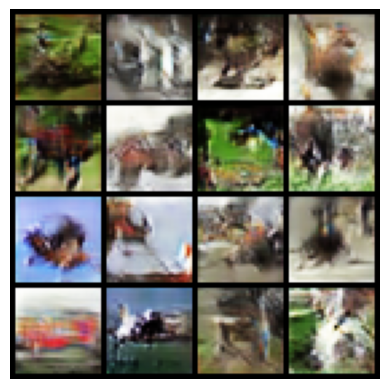

Epoch [11/100]                        Batch 100/1563 Discriminator Loss: 0.4559 Generator Loss: 1.6057
Epoch [11/100]                        Batch 200/1563 Discriminator Loss: 0.6548 Generator Loss: 1.6898
Epoch [11/100]                        Batch 300/1563 Discriminator Loss: 0.6677 Generator Loss: 1.4058
Epoch [11/100]                        Batch 400/1563 Discriminator Loss: 0.5342 Generator Loss: 0.9265
Epoch [11/100]                        Batch 500/1563 Discriminator Loss: 0.5953 Generator Loss: 0.9051
Epoch [11/100]                        Batch 600/1563 Discriminator Loss: 0.5569 Generator Loss: 1.7952
Epoch [11/100]                        Batch 700/1563 Discriminator Loss: 0.4135 Generator Loss: 0.9963
Epoch [11/100]                        Batch 800/1563 Discriminator Loss: 0.7782 Generator Loss: 0.9494
Epoch [11/100]                        Batch 900/1563 Discriminator Loss: 0.5951 Generator Loss: 1.2234
Epoch [11/100]                        Batch 1000/1563 Discriminator Loss:

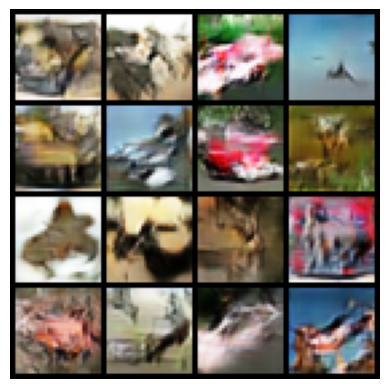

Epoch [21/100]                        Batch 100/1563 Discriminator Loss: 0.4548 Generator Loss: 1.3319
Epoch [21/100]                        Batch 200/1563 Discriminator Loss: 0.6287 Generator Loss: 1.5108
Epoch [21/100]                        Batch 300/1563 Discriminator Loss: 0.6395 Generator Loss: 1.3373
Epoch [21/100]                        Batch 400/1563 Discriminator Loss: 0.4749 Generator Loss: 1.8670
Epoch [21/100]                        Batch 500/1563 Discriminator Loss: 0.8413 Generator Loss: 0.7919
Epoch [21/100]                        Batch 600/1563 Discriminator Loss: 0.4298 Generator Loss: 1.3323
Epoch [21/100]                        Batch 700/1563 Discriminator Loss: 0.5683 Generator Loss: 1.4060
Epoch [21/100]                        Batch 800/1563 Discriminator Loss: 0.5270 Generator Loss: 2.1987
Epoch [21/100]                        Batch 900/1563 Discriminator Loss: 0.6487 Generator Loss: 0.7278
Epoch [21/100]                        Batch 1000/1563 Discriminator Loss:

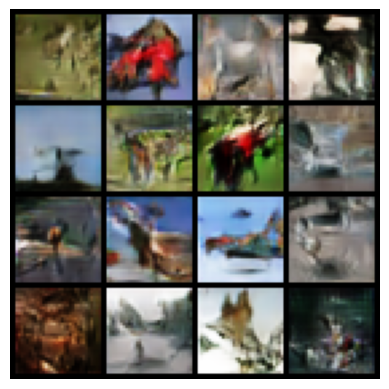

Epoch [31/100]                        Batch 100/1563 Discriminator Loss: 0.5023 Generator Loss: 1.5843
Epoch [31/100]                        Batch 200/1563 Discriminator Loss: 0.3368 Generator Loss: 1.1768
Epoch [31/100]                        Batch 300/1563 Discriminator Loss: 0.4546 Generator Loss: 1.3109
Epoch [31/100]                        Batch 400/1563 Discriminator Loss: 0.4700 Generator Loss: 1.6357
Epoch [31/100]                        Batch 500/1563 Discriminator Loss: 0.3858 Generator Loss: 1.6578
Epoch [31/100]                        Batch 600/1563 Discriminator Loss: 0.5409 Generator Loss: 0.9858
Epoch [31/100]                        Batch 700/1563 Discriminator Loss: 0.6401 Generator Loss: 0.9834
Epoch [31/100]                        Batch 800/1563 Discriminator Loss: 0.3808 Generator Loss: 1.8091
Epoch [31/100]                        Batch 900/1563 Discriminator Loss: 0.8024 Generator Loss: 0.9145
Epoch [31/100]                        Batch 1000/1563 Discriminator Loss:

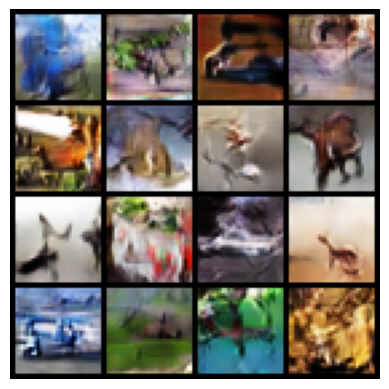

Epoch [41/100]                        Batch 100/1563 Discriminator Loss: 0.5636 Generator Loss: 0.9117
Epoch [41/100]                        Batch 200/1563 Discriminator Loss: 0.5748 Generator Loss: 0.5106
Epoch [41/100]                        Batch 300/1563 Discriminator Loss: 0.8837 Generator Loss: 0.5633
Epoch [41/100]                        Batch 400/1563 Discriminator Loss: 0.4245 Generator Loss: 1.5257
Epoch [41/100]                        Batch 500/1563 Discriminator Loss: 0.7075 Generator Loss: 1.4594
Epoch [41/100]                        Batch 600/1563 Discriminator Loss: 0.4812 Generator Loss: 1.5973
Epoch [41/100]                        Batch 700/1563 Discriminator Loss: 0.2222 Generator Loss: 1.2101
Epoch [41/100]                        Batch 800/1563 Discriminator Loss: 0.6525 Generator Loss: 2.6265
Epoch [41/100]                        Batch 900/1563 Discriminator Loss: 0.5655 Generator Loss: 0.8301
Epoch [41/100]                        Batch 1000/1563 Discriminator Loss:

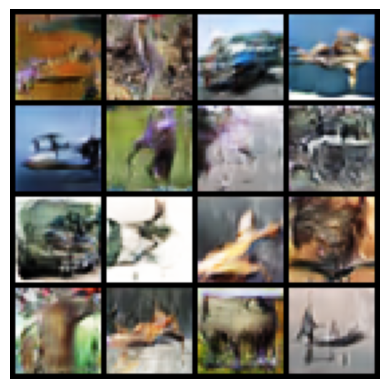

Epoch [51/100]                        Batch 100/1563 Discriminator Loss: 0.3440 Generator Loss: 1.5456
Epoch [51/100]                        Batch 200/1563 Discriminator Loss: 0.6204 Generator Loss: 1.5833
Epoch [51/100]                        Batch 300/1563 Discriminator Loss: 0.7310 Generator Loss: 1.6659
Epoch [51/100]                        Batch 400/1563 Discriminator Loss: 0.3530 Generator Loss: 1.0293
Epoch [51/100]                        Batch 500/1563 Discriminator Loss: 0.4466 Generator Loss: 1.6291
Epoch [51/100]                        Batch 600/1563 Discriminator Loss: 0.4219 Generator Loss: 1.3327
Epoch [51/100]                        Batch 700/1563 Discriminator Loss: 0.2527 Generator Loss: 1.9842
Epoch [51/100]                        Batch 800/1563 Discriminator Loss: 0.3426 Generator Loss: 1.6828
Epoch [51/100]                        Batch 900/1563 Discriminator Loss: 0.2999 Generator Loss: 1.1351
Epoch [51/100]                        Batch 1000/1563 Discriminator Loss:

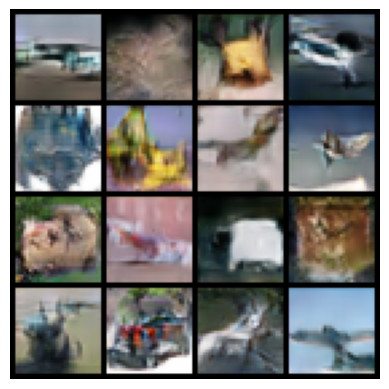

Epoch [61/100]                        Batch 100/1563 Discriminator Loss: 0.5584 Generator Loss: 1.3915
Epoch [61/100]                        Batch 200/1563 Discriminator Loss: 0.3960 Generator Loss: 1.0068
Epoch [61/100]                        Batch 300/1563 Discriminator Loss: 0.4722 Generator Loss: 1.0610
Epoch [61/100]                        Batch 400/1563 Discriminator Loss: 0.3272 Generator Loss: 1.8969
Epoch [61/100]                        Batch 500/1563 Discriminator Loss: 0.4121 Generator Loss: 1.1803
Epoch [61/100]                        Batch 600/1563 Discriminator Loss: 0.3926 Generator Loss: 0.6072
Epoch [61/100]                        Batch 700/1563 Discriminator Loss: 0.3281 Generator Loss: 1.1207
Epoch [61/100]                        Batch 800/1563 Discriminator Loss: 0.9870 Generator Loss: 1.1105
Epoch [61/100]                        Batch 900/1563 Discriminator Loss: 0.3618 Generator Loss: 1.1412
Epoch [61/100]                        Batch 1000/1563 Discriminator Loss:

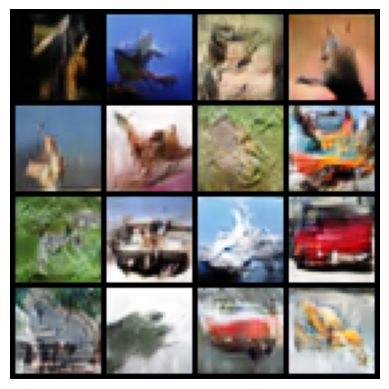

Epoch [71/100]                        Batch 100/1563 Discriminator Loss: 0.6268 Generator Loss: 0.9289
Epoch [71/100]                        Batch 200/1563 Discriminator Loss: 0.3760 Generator Loss: 1.5609
Epoch [71/100]                        Batch 300/1563 Discriminator Loss: 0.2722 Generator Loss: 1.3059
Epoch [71/100]                        Batch 400/1563 Discriminator Loss: 0.5772 Generator Loss: 1.4492
Epoch [71/100]                        Batch 500/1563 Discriminator Loss: 0.7259 Generator Loss: 1.2739
Epoch [71/100]                        Batch 600/1563 Discriminator Loss: 0.8001 Generator Loss: 1.0693
Epoch [71/100]                        Batch 700/1563 Discriminator Loss: 0.6089 Generator Loss: 0.9937
Epoch [71/100]                        Batch 800/1563 Discriminator Loss: 0.4057 Generator Loss: 2.1416
Epoch [71/100]                        Batch 900/1563 Discriminator Loss: 0.4977 Generator Loss: 1.5163
Epoch [71/100]                        Batch 1000/1563 Discriminator Loss:

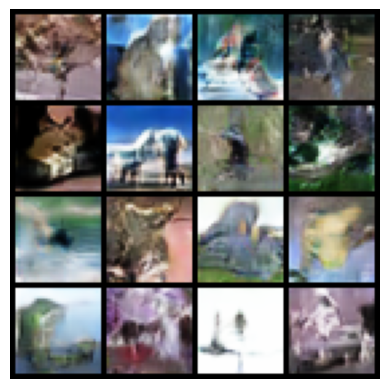

Epoch [81/100]                        Batch 100/1563 Discriminator Loss: 0.3544 Generator Loss: 1.0795
Epoch [81/100]                        Batch 200/1563 Discriminator Loss: 0.3661 Generator Loss: 1.1514
Epoch [81/100]                        Batch 300/1563 Discriminator Loss: 0.2779 Generator Loss: 1.5732
Epoch [81/100]                        Batch 400/1563 Discriminator Loss: 0.3999 Generator Loss: 1.0384
Epoch [81/100]                        Batch 500/1563 Discriminator Loss: 0.6038 Generator Loss: 1.3080
Epoch [81/100]                        Batch 600/1563 Discriminator Loss: 0.3767 Generator Loss: 0.8351
Epoch [81/100]                        Batch 700/1563 Discriminator Loss: 1.1839 Generator Loss: 1.6403
Epoch [81/100]                        Batch 800/1563 Discriminator Loss: 0.9129 Generator Loss: 0.5762
Epoch [81/100]                        Batch 900/1563 Discriminator Loss: 0.8918 Generator Loss: 0.8972
Epoch [81/100]                        Batch 1000/1563 Discriminator Loss:

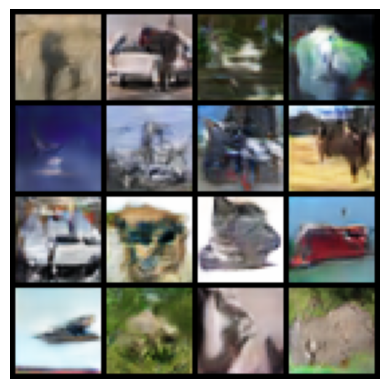

Epoch [91/100]                        Batch 100/1563 Discriminator Loss: 0.4755 Generator Loss: 1.3365
Epoch [91/100]                        Batch 200/1563 Discriminator Loss: 0.5648 Generator Loss: 1.4974
Epoch [91/100]                        Batch 300/1563 Discriminator Loss: 0.3220 Generator Loss: 1.4601
Epoch [91/100]                        Batch 400/1563 Discriminator Loss: 0.2037 Generator Loss: 1.1864
Epoch [91/100]                        Batch 500/1563 Discriminator Loss: 0.5008 Generator Loss: 1.1229
Epoch [91/100]                        Batch 600/1563 Discriminator Loss: 0.4654 Generator Loss: 1.9573
Epoch [91/100]                        Batch 700/1563 Discriminator Loss: 0.4130 Generator Loss: 1.8416
Epoch [91/100]                        Batch 800/1563 Discriminator Loss: 0.4271 Generator Loss: 1.7369
Epoch [91/100]                        Batch 900/1563 Discriminator Loss: 0.5793 Generator Loss: 0.8181
Epoch [91/100]                        Batch 1000/1563 Discriminator Loss:

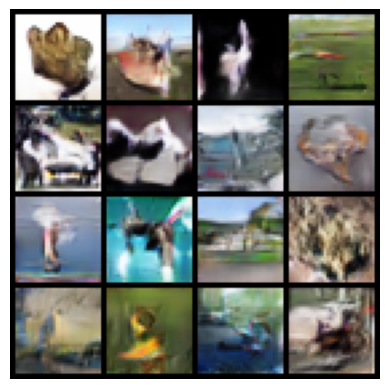

In [ ]:
# Training loop
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
       # Convert list to tensor
        real_images = batch[0].to(device)
        # Adversarial ground truths
        valid = torch.ones(real_images.size(0), 1, device=device)
        fake = torch.zeros(real_images.size(0), 1, device=device)
        # Configure input
        real_images = real_images.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Sample noise as generator input
        z = torch.randn(real_images.size(0), latent_dim, device=device)
        # Generate a batch of images
        fake_images = generator(z)

        # Measure discriminator's ability
        # to classify real and fake images
        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()
        # Generate a batch of images
        gen_images = generator(z)
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        # ---------------------
        #  Progress Monitoring
        # ---------------------
        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    # Save generated images for every epoch
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()